LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 5.35 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		1332
Subintegration time (s):	6


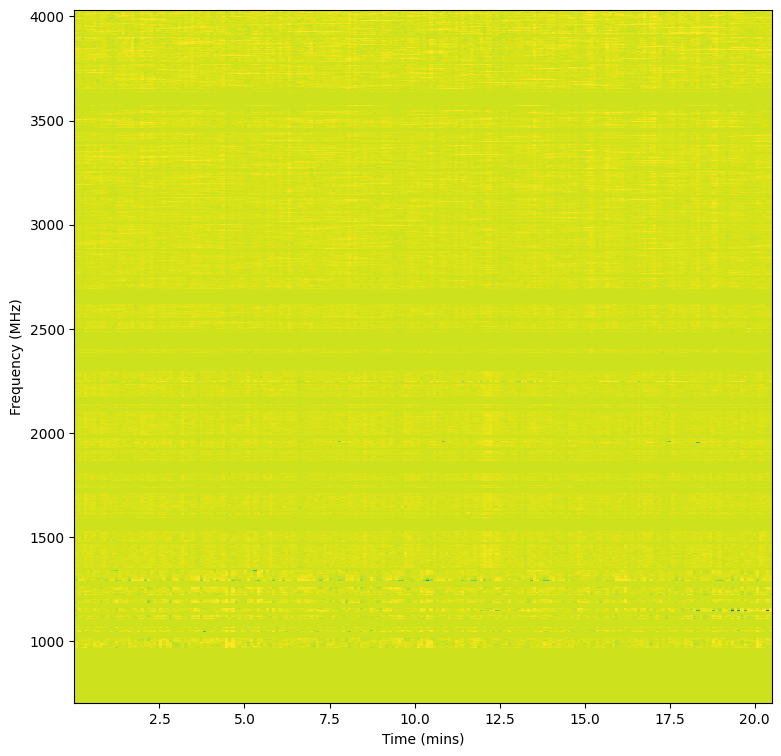

In [1]:
import numpy as np
import psrchive
import dynspectools as dtools

import glob
import astropy.units as u
from astropy.time import Time

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline


from scintools.dynspec import Dynspec  # The dynamic spectrum class
#dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/P970/P970_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing
dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing

dyn.plot_dyn() # plot the dynamic spectrum


LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 0.62 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		1332
Subintegration time (s):	6


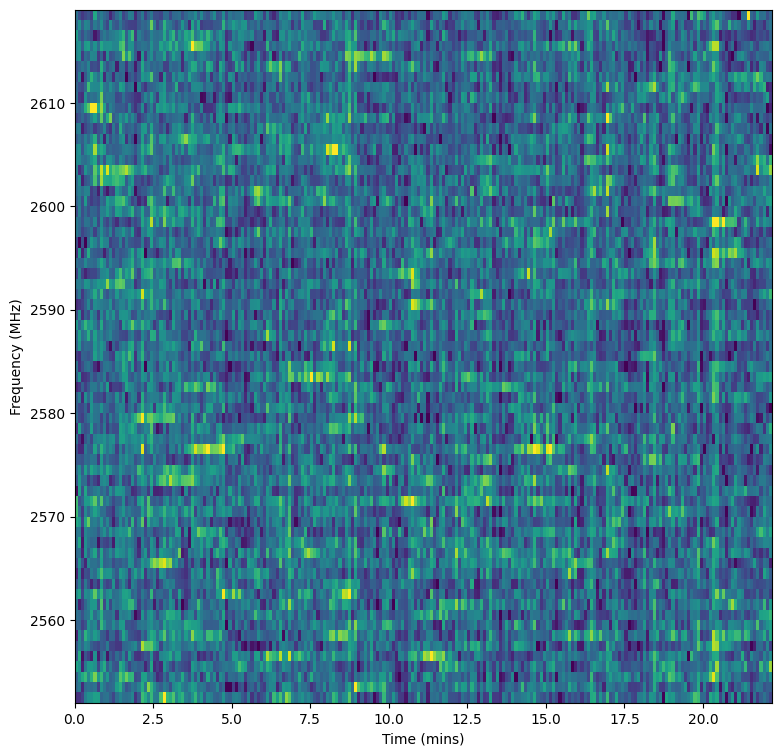

In [46]:
dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing

#f = (3910,4025)
#f = (3660,3760)
#f = (3300,3375)
#f = (3150,3250)
#f = (2760,2860)
#f = (2501,2531)

f = (2552,2619)

dyn.crop_dyn(fmin=f[0], fmax=f[1]) # crop out a clean part of the band

dyn.trim_edges() # remove any zeros from the edges
dyn.refill(method='mean') # refill any gaps with the mean

dyn.plot_dyn() # plot the dynamic spectrum

dyn.get_scint_params(method='acf2d_approx', plot=False) # measure the scintillation parameters

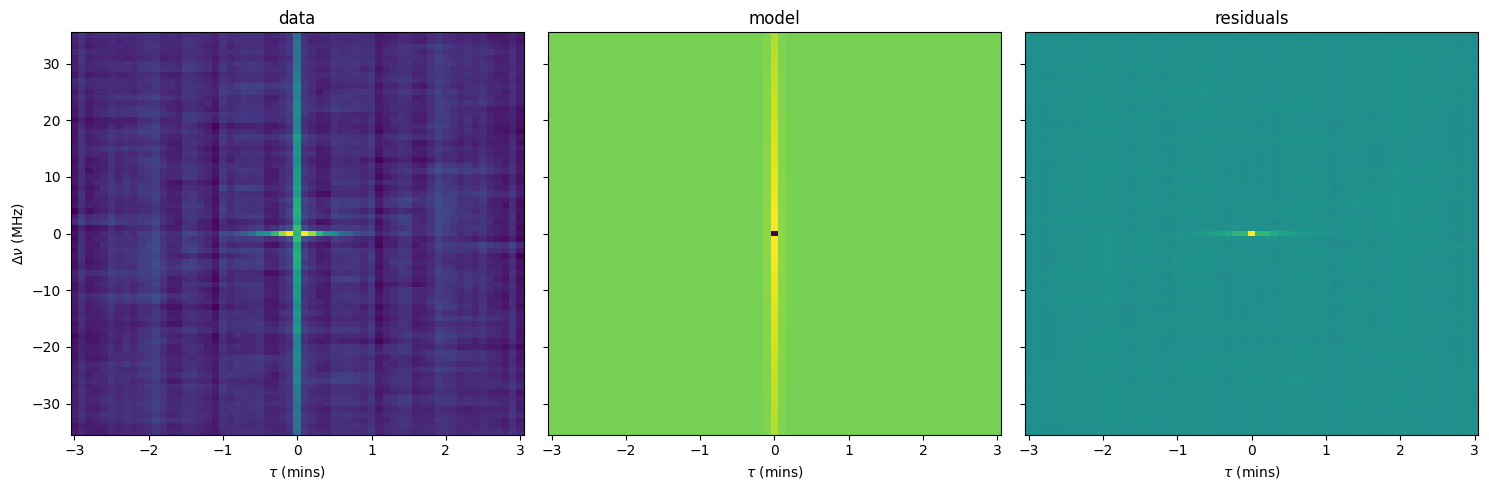

In [47]:

dyn.get_scint_params(method='acf2d_approx', plot=True) # measure the scintillation parameters

In [48]:
#f = ([2501,2531],[2550,2618],[2760,2860],[3150,3250],[3300,3375],[3660,3760],[3910,4025])
f = ([2501,2531],[2552,2619],[2760,2860],[3150,3250],[3300,3375],[3660,3760],[3910,4025])

data = []
for i in range(len(f)):
    dyn = Dynspec(filename='/media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds')  # loads the first dynamic spectrum, without processing

    fmin = f[i][0]
    fmax = f[i][1]
    dyn.crop_dyn(fmin=fmin, fmax=fmax) # crop out a clean part of the band

    dyn.trim_edges() # remove any zeros from the edges
    dyn.refill(method='mean') # refill any gaps with the mean

    dyn.get_scint_params(method='acf2d_approx', plot=False) # measure the scintillation parameters

    a = ([int(fmin+(fmin-fmax)/2), dyn.dnu, dyn.dnuerr, dyn.tau, dyn.tauerr])
    data.append(a)

LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 0.61 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		1332
Subintegration time (s):	6

LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 0.56 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
Integration time (s):		1332
Subintegration time (s):	6
LOADING /media/joel/JB_EXHDD/J1809-1943/PX500/38329/PX500_38329_psrflux_704-4032.ds...
...LOADED in 0.56 seconds

	 OBSERVATION PROPERTIES

filename:			PX500_38329_psrflux_704-4032.ds
MJD:				58469.17331642893
Centre frequency (MHz):		2368.0
Bandwidth (MHz):		3328.0
Channel bandwidth (MHz):	1.0
I

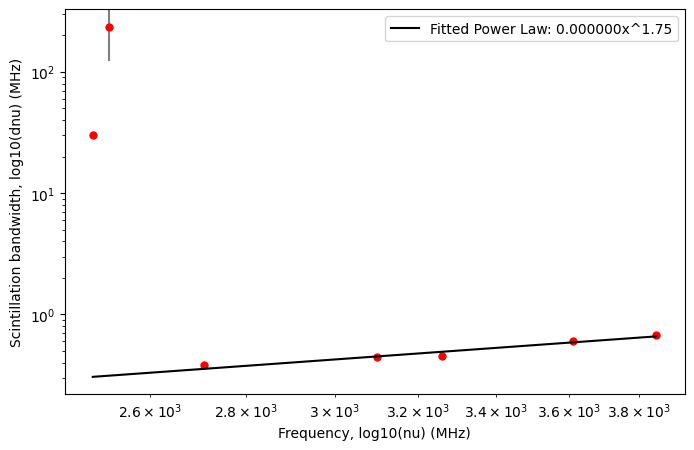

In [50]:
fig = plt.figure(figsize=(8,5))
x = [i[0] for i in data]
y = [i[1] for i in data]
plt.errorbar(x, y, yerr=[i[2] for i in data], fmt='none', c='grey')
plt.plot(x, y, 'o', markersize=5, c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency, log10(nu) (MHz)')
plt.ylabel('Scintillation bandwidth, log10(dnu) (MHz)')


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(power_law, x, y, sigma=[i[2] for i in data], absolute_sigma=True)
a_fit, b_fit = popt

# Plot the data and the fitted power law
plt.plot(x, power_law(x, a_fit, b_fit), color='k', label='Fitted Power Law: {:.6f}x^{:.2f}'.format(a_fit, b_fit))
plt.legend()




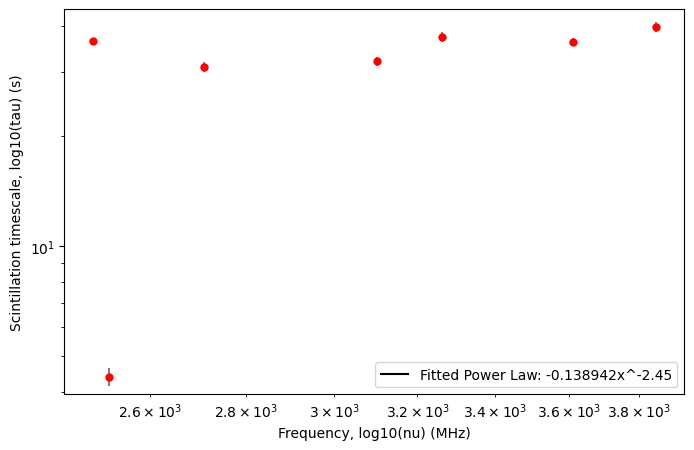

In [49]:
fig = plt.figure(figsize=(8,5))
x = [i[0] for i in data]
y = [i[3] for i in data]
plt.errorbar(x, y, yerr=[i[4] for i in data], fmt='none', c='grey')
plt.plot(x, y, 'o', markersize=5, c='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency, log10(nu) (MHz)')
plt.ylabel('Scintillation timescale, log10(tau) (s)')


from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a * np.power(x, b)

popt, pcov = curve_fit(power_law, x, y, sigma=[i[4] for i in data], absolute_sigma=True)
a_fit, b_fit = popt

# Plot the data and the fitted power law
plt.plot(x, power_law(x, a_fit, b_fit), color='k', label='Fitted Power Law: {:.6f}x^{:.2f}'.format(a_fit, b_fit))
plt.legend()


